In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!gdown 1UZNOcb-bSL-aPPXWcPH4h4Kbx4G-bk9J

Downloading...
From: https://drive.google.com/uc?id=1UZNOcb-bSL-aPPXWcPH4h4Kbx4G-bk9J
To: /content/mnist_train.csv
100% 76.8M/76.8M [00:01<00:00, 65.6MB/s]


In [3]:
d0 = pd.read_csv('mnist_train.csv')
d0.shape

(42000, 785)

In [5]:
d0.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
l = d0['label']

# Drop the label feature and store the pixel data in d.
d = d0.drop("label",axis=1)

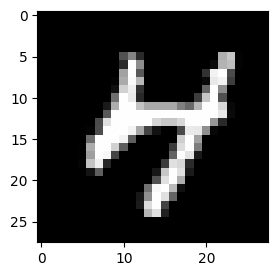

4


In [10]:
# display or plot a number.
plt.figure(figsize=(3,3))
idx = 32

img_data = d.iloc[idx].values.reshape(28, 28)  # reshape from 1d to 2d pixel array
plt.imshow(img_data, cmap = "gray")
plt.show()

print(l[idx])


In [12]:
from sklearn import datasets

digits = datasets.load_digits()

X=digits.data
print(X.shape)

(1797, 64)


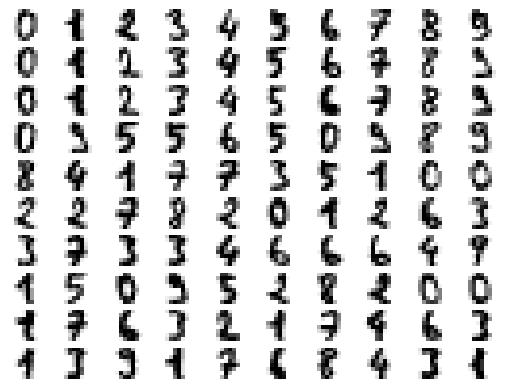

In [14]:
plt.set_cmap('binary')

for i in range(10):
  for j in range(10):
   ax = plt.subplot(10,10,1+10*i+j)
   ax.axis('off')
   ax.matshow(digits.images[10*i+j])

plt.show()
plt.close()

In [17]:
X.shape

(1797, 64)

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_std = scaler.fit_transform(X)

In [16]:
from sklearn.decomposition import PCA

In [22]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_std)

X_pca.shape

(1797, 2)

In [23]:
X_pca[:10]

array([[-1.91421366, -0.95450157],
       [-0.58898033,  0.9246358 ],
       [-1.30203906, -0.31718883],
       [ 3.0207702 , -0.86877232],
       [-4.52894903, -1.09347989],
       [ 1.30188958, -1.14818278],
       [-1.43422221, -2.95784467],
       [-0.61423957,  5.46218401],
       [ 1.09845106, -0.66582328],
       [ 0.53796986, -0.77749268]])

In [40]:
digits.target[:15]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4])

<Figure size 1000x1000 with 0 Axes>

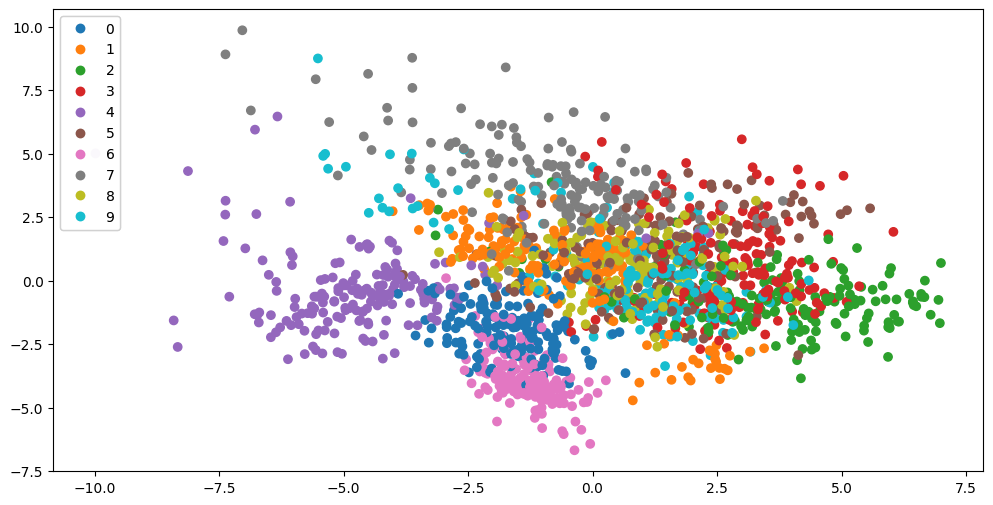

In [28]:
plt.set_cmap('tab10')
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
scatter = ax.scatter(X_pca[:,0], X_pca[:,1], c=digits.target)

legend = ax.legend(*scatter.legend_elements(),loc="upper left")
ax.add_artist(legend)

plt.show()
plt.close()

In [29]:
pca.explained_variance_ratio_

array([0.12033916, 0.09561054])

In [30]:
pca.explained_variance_ratio_.sum()

0.21594970500832789

In [37]:
pca = PCA(n_components = 5)
X_pca = pca.fit_transform(X_std)
pca.explained_variance_ratio_.sum()

0.4139794817694788

In [38]:
# eigen values.
pca.explained_variance_

array([7.34477606, 5.83549054, 5.15396118, 3.96623597, 2.9663452 ])

In [32]:
pca = PCA()
X_pca = pca.fit_transform(X_std)

pca.explained_variance_ratio_.sum()

1.0

In [33]:
# importance....
pca.explained_variance_ratio_

array([0.12033916, 0.09561054, 0.08444415, 0.06498408, 0.04860155,
       0.0421412 , 0.03942083, 0.03389381, 0.02998221, 0.02932003,
       0.02781805, 0.02577055, 0.02275303, 0.0222718 , 0.02165229,
       0.01914167, 0.01775547, 0.01638069, 0.0159646 , 0.01489191,
       0.0134797 , 0.01271931, 0.01165837, 0.01057647, 0.00975316,
       0.00944559, 0.00863014, 0.00836643, 0.00797693, 0.00746471,
       0.00725582, 0.00691911, 0.00653909, 0.00640793, 0.00591384,
       0.00571162, 0.00523637, 0.00481808, 0.00453719, 0.00423163,
       0.00406053, 0.00397085, 0.00356493, 0.00340787, 0.00327835,
       0.00311032, 0.00288575, 0.00276489, 0.00259175, 0.00234483,
       0.00218257, 0.00203598, 0.00195512, 0.00183318, 0.00167946,
       0.00161236, 0.00147763, 0.00135118, 0.00125101, 0.00103696,
       0.00082535, 0.        , 0.        , 0.        ])

In [34]:
pca.explained_variance_ratio_.cumsum()

array([0.12033916, 0.21594971, 0.30039385, 0.36537793, 0.41397948,
       0.45612068, 0.49554151, 0.52943532, 0.55941753, 0.58873755,
       0.61655561, 0.64232616, 0.66507919, 0.68735099, 0.70900328,
       0.72814495, 0.74590042, 0.76228111, 0.77824572, 0.79313763,
       0.80661732, 0.81933664, 0.83099501, 0.84157148, 0.85132464,
       0.86077023, 0.86940036, 0.87776679, 0.88574372, 0.89320844,
       0.90046426, 0.90738337, 0.91392246, 0.92033038, 0.92624422,
       0.93195585, 0.93719222, 0.94201029, 0.94654748, 0.95077911,
       0.95483964, 0.95881049, 0.96237542, 0.9657833 , 0.96906165,
       0.97217197, 0.97505772, 0.97782262, 0.98041436, 0.98275919,
       0.98494176, 0.98697774, 0.98893286, 0.99076605, 0.99244551,
       0.99405787, 0.9955355 , 0.99688668, 0.99813769, 0.99917465,
       1.        , 1.        , 1.        , 1.        ])

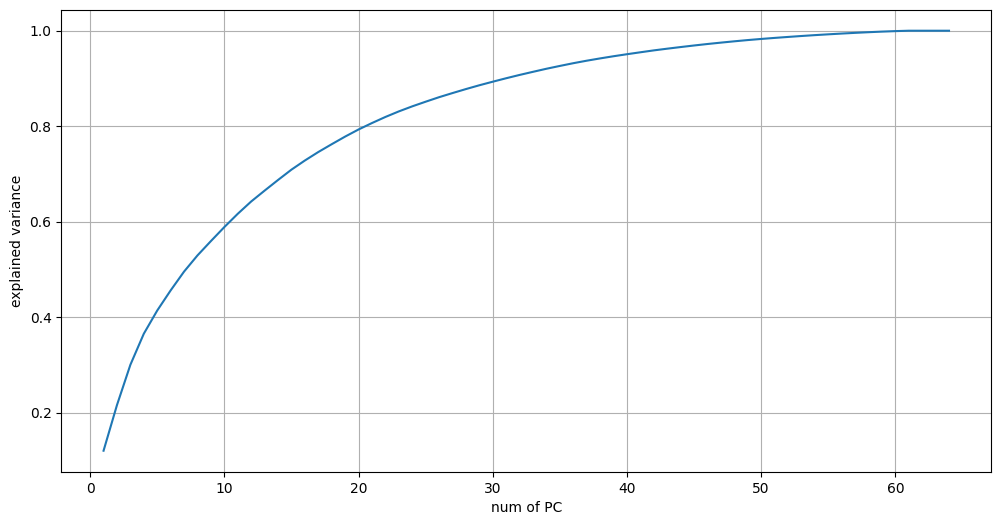

In [36]:
plt.plot(range(1, 65), pca.explained_variance_ratio_.cumsum())
plt.xlabel("num of PC")
plt.ylabel("explained variance")
plt.grid("on")
plt.show()

In [ ]:
# newdata :(1800, 64)

# to preserve 90% variance

# 14 features


